In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import os

# 1) Load preprocessed data
X = np.load("../data/X.npy")
y = np.load("../data/y.npy")

print("Loaded data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# 2) Train/Test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set:", X_train.shape)
print("Testing set:", X_test.shape)

# 3) Build Neural Network Model

input_dim = X_train.shape[1]
print("Input dimensions:", input_dim)

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 4) Training

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)



Loaded data:
X shape: (148517, 95)
y shape: (148517,)

Training set: (118813, 95)
Testing set: (29704, 95)
Input dimensions: 95


c:\Users\ASUS\miniconda3\envs\alz\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,257 (32.25 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9569 - loss: 0.1285 - val_accuracy: 0.9693 - val_loss: 0.0858
Epoch 2/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9685 - loss: 0.0886 - val_accuracy: 0.9727 - val_loss: 0.0707
Epoch 3/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9715 - loss: 0.0792 - val_accuracy: 0.9737 - val_loss: 0.0668
Epoch 4/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9728 - loss: 0.0744 - val_accuracy: 0.9752 - val_loss: 0.0625
Epoch 5/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9746 - loss: 0.0700 - val_accuracy: 0.9790 - val_loss: 0.0559
Epoch 6/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9760 - loss: 0.0652 - val_accuracy: 0.9802 - val_loss: 0.0574
Epoch 7/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9765 - loss: 0.0615 - val_accuracy: 0.9807 - val_loss: 0.0495
Epoch 8/30
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0564 

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step



Accuracy: 0.9865674656611904

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15411
           1       0.99      0.99      0.99     14293

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704


Confusion Matrix:
[[15223   188]
 [  211 14082]]

Model saved to: models/nslkdd_dnn_model.h5
History saved to models/training_history.npy


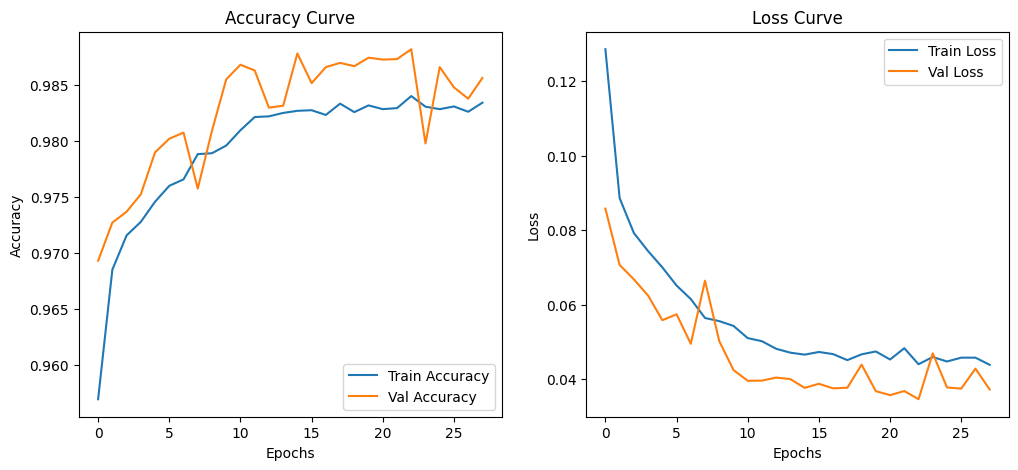

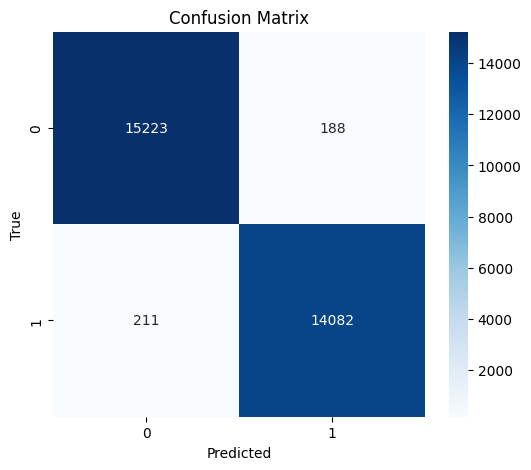